PARTE I

In [2]:
#pip install pandas

import pandas as pd 

In [5]:
# a
# Abrimos la base y creamos una copia para poder trabajar sin tener que reinciar en caso de error
dataframe = pd.read_excel("usu_individual_T123.xlsx")

datos = dataframe.copy()




In [6]:

# Guardamos las observaciones que son únicamente del AMBA (CABA y Gran Buenos Aires)
datos2 = datos[datos['AGLOMERADO'].isin([32, 33])]

datos2



,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
102,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,NaN,4,67500.00,5,NaN,5,5.0,NaN,6,2540
103,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,NaN,4,67500.00,5,NaN,5,5.0,NaN,6,2540
104,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082
105,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082
106,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48597,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,NaN,8,254000.00,10,NaN,10,10.0,NaN,10,1516
48598,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
48599,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,2,1,1,S,33,1193,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
48600,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,3,1,1,S,33,1193,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0


In [7]:
# b
#Eliminamos observaciones que no tienen sentido:

#Eliminamos observaciones con edad negativa

datos2 = datos2.drop(datos2[datos2['CH06'] < 0].index)

#Eliminamos las variables de ingresos con observaciones negativas

datos2 = datos2.drop(datos2[datos2['P21'] < 0].index)

datos2 = datos2.drop(datos2[datos2['P47T'] < 0].index)


#Eliminamos las observacion de variables que tienen ns/nr que son de nuestro interés ()


datos2 = datos2[~((datos2['CH08'] == 9) | (datos2['NIVEL_ED'] == 9) | (datos2['CAT_OCUP'] == 9) | (datos2['CH07'] == 9) )]




datos2


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
102,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,NaN,4,67500.00,5,NaN,5,5.0,NaN,6,2540
103,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,NaN,4,67500.00,5,NaN,5,5.0,NaN,6,2540
104,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082
105,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082
106,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,NaN,2,23333.33,1,NaN,1,1.0,NaN,1,14082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48595,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,2,1,1,S,33,1236,...,NaN,10,160000.00,9,NaN,9,9.0,NaN,9,2295
48596,TQRMNOPVVHKLRQCDEIJAH00780546,2023,1,1,3,0,1,S,33,1236,...,NaN,10,160000.00,9,NaN,9,9.0,NaN,9,2295
48597,TQRMNOQPTHKKRRCDEIJAH00780327,2023,1,1,1,1,1,S,33,1300,...,NaN,8,254000.00,10,NaN,10,10.0,NaN,10,1516
48598,TQRMNOPTXHKORSCDEIJAH00780269,2023,1,1,1,1,1,S,33,1193,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0


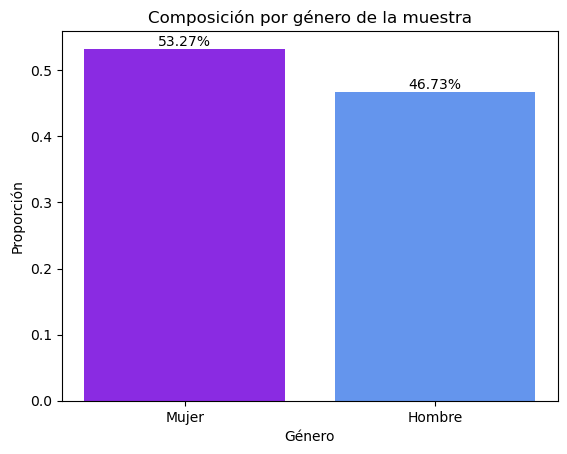

3176 2786


<Figure size 640x480 with 0 Axes>

In [8]:
#c

import matplotlib.pyplot as plt

#creamos una dummy para las mujeres y otra para los hombres con astype(int)
datos2['hombre'] = (datos2['CH04'] == 1).astype(int)
datos2['mujer'] = (datos2['CH04'] == 2).astype(int)

# Contamos la cantidad de hombres y mujeres con .sum y sacamos la proporcion de la muestra de cada uno para el grafico
total_mujeres = datos2['mujer'].sum()
total_hombres = datos2['hombre'].sum()
prop_m = total_mujeres / len(datos2)
prop_h = total_hombres / len(datos2)

# Elegimos los colores para el bar graph
colores = ['blueviolet', 'cornflowerblue']

# Crear el gráfico de barras
bars = plt.bar(['Mujer', 'Hombre'], [prop_m, prop_h], color=colores)


# Etiquetas para las barras
labels = [f"{prop_m * 100:.2f}%", f"{prop_h * 100:.2f}%"]  # Convierte las proporciones a porcentaje y redondea

# Añadir etiquetas a las barras
for bar, label in zip(bars, labels):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label, ha='center', va='bottom')

# Le ponemos etiquetas al grafico
plt.xlabel('Género')
plt.ylabel('Proporción')
plt.title('Composición por género de la muestra')


plt.show()

#guardamos el graph
plt.savefig("gender.png")

print(total_mujeres, total_hombres)


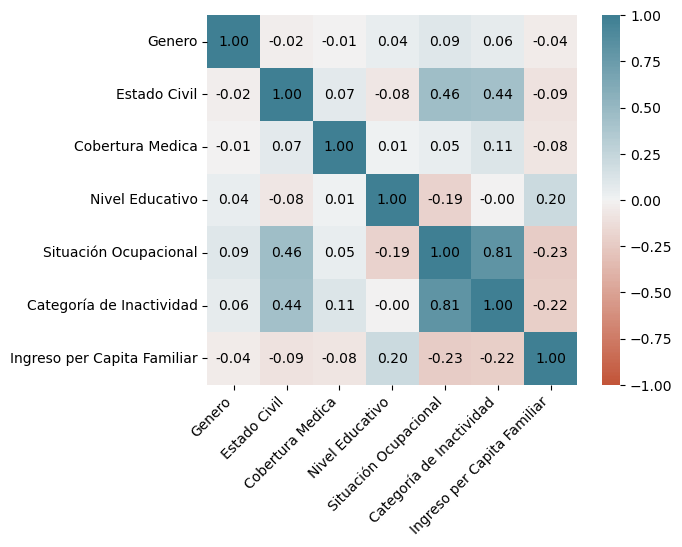

In [9]:
# d
# pip install seaborn
import seaborn as sns

datos_temporal = datos2.copy()

# Luego, renombra la columna en la copia
datos_temporal.rename


# Para restaurar el nombre original, puedes eliminar la columna renombrada de 'datos_temporal'


datos_temporal.rename(columns={'CH04': 'Genero'}, inplace=True)
datos_temporal.rename(columns={'CH07': 'Estado Civil'}, inplace=True)
datos_temporal.rename(columns={'CH08': 'Cobertura Medica'}, inplace=True)
datos_temporal.rename(columns={'NIVEL_ED': 'Nivel Educativo'}, inplace=True)
datos_temporal.rename(columns={'ESTADO': 'Situación Ocupacional'}, inplace=True)
datos_temporal.rename(columns={'CAT_INAC': 'Categoría de Inactividad'}, inplace=True)
datos_temporal.rename(columns={'IPCF': 'Ingreso per Capita Familiar'}, inplace=True)

# Creamos una lista de las variables que queremos incluir en la matriz de correlaciones

variables_a_incluir= ['Genero', 'Estado Civil', 'Cobertura Medica', 'Nivel Educativo', 'Situación Ocupacional', 'Categoría de Inactividad', 'Ingreso per Capita Familiar']


# Crear un DataFrame temporal con las variables seleccionadas
datos_temporal = datos_temporal[variables_a_incluir]

#Creamos la matriz de correlaciones
corr = datos_temporal.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)


# Usamos un for anidado para recorrer las filas y columnas de la matriz de correlación y agregar etiquetas a las celdas del mapa de calor.
for i in range(len(variables_a_incluir)):
    for j in range(len(variables_a_incluir)):
        text = f"{corr.iloc[i, j]:.2f}"
        ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black')

# Establecer las etiquetas de las variables en el eje x
ax.set_xticklabels(
    variables_a_incluir,
    rotation=45,
    horizontalalignment='right'
)

#Guardamos el gráfico
plt.savefig("mapa_de_correlaciones.png", dpi=300, bbox_inches='tight')

#Eliminamos los datos temporales
del datos_temporal

In [10]:
# e

# Generamos las columnas unemployed, employed y inactive, a travez de la variable ESTADO
datos2['unem'] = (datos2['ESTADO'] == 2).astype(int)
datos2['emp'] = (datos2['ESTADO'] == 1).astype(int)
datos2['inac'] = (datos2['ESTADO'] == 3).astype(int)


# Como las variables generadas son dummies, podemos sumar los valores para asi obtener la cantidad total en cada categoria
total_emp = datos2['emp'].sum()
total_unemp = datos2['unem'].sum()
total_inac= datos2['inac'].sum()

# Para calcular la media de ingresos, usamos la funcion .mean(), filtrando por su estado
media_unem = datos2[datos2['unem'] == 1]['IPCF'].mean()
media_emp = datos2[datos2['emp'] == 1]['IPCF'].mean()
media_inac = datos2[datos2['inac'] == 1]['IPCF'].mean()

# Imprimimos los valores
print(total_emp, total_unemp, total_inac)
print(round(media_unem, 3), round(media_emp,3), round(media_inac, 3))

2249 262 2529
27875.2 93268.954 44797.115


In [11]:
# f

#Generamos la columna adulto_equiv

datos2['adulto_equiv'] = 0



# Corremos las condiciones para las mujeres:
condicion = (datos2['CH06'] < 1) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.35


condicion = (datos2['CH06'] == 2) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.46


condicion = (datos2['CH06'] == 3) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.51


condicion = (datos2['CH06'] == 4) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.55


condicion = (datos2['CH06'] == 5) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.6


condicion = (datos2['CH06'] == 6) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.64


condicion = (datos2['CH06'] == 7) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.66


condicion = (datos2['CH06'] == 8) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.68


condicion = (datos2['CH06'] == 9) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.69


condicion = (datos2['CH06'] == 10) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.7 


condicion = (datos2['CH06'] == 11) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.72


condicion = (datos2['CH06'] == 12) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.74


condicion = (datos2['CH06'] == 13) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.76


condicion = (datos2['CH06'] == 14) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.76


condicion = (datos2['CH06'] == 15) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.77


condicion = (datos2['CH06'] == 16) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.77


condicion = (datos2['CH06'] == 17) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.77


condicion = (datos2['CH06'] > 18) & (datos2['CH06'] <= 29) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.76


condicion = (datos2['CH06'] > 30) & (datos2['CH06'] <= 45) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.77


condicion = (datos2['CH06'] > 46) & (datos2['CH06'] <= 60) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.76


condicion = (datos2['CH06'] > 61) & (datos2['CH06'] <= 75) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.67


condicion = (datos2['CH06'] > 75) & (datos2['CH04'] == 2)

datos2.loc[condicion, 'adulto_equiv'] = 0.63

# Corremos las condiciones para los hombres:
condicion = (datos2['CH06'] < 1) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.35


condicion = (datos2['CH06'] == 1) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.37

condicion = (datos2['CH06'] == 2) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.46

condicion = (datos2['CH06'] == 3) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.51

condicion = (datos2['CH06'] == 4) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.55

condicion = (datos2['CH06'] == 5) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.60

condicion = (datos2['CH06'] == 6) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.64

condicion = (datos2['CH06'] == 7) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.66

condicion = (datos2['CH06'] == 8) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.68

condicion = (datos2['CH06'] == 9) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.69

condicion = (datos2['CH06'] == 10) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.79

condicion = (datos2['CH06'] == 11) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.82

condicion = (datos2['CH06'] == 12) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.85

condicion = (datos2['CH06'] == 13) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.90

condicion = (datos2['CH06'] == 14) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.96

condicion = (datos2['CH06'] == 15) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 1.00

condicion = (datos2['CH06'] == 16) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 1.03

condicion = (datos2['CH06'] == 17) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 1.04

condicion = (datos2['CH06'] >= 18) & (datos2['CH06'] <= 29) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 1.02

condicion = (datos2['CH06'] >= 30) & (datos2['CH06'] <= 45) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 1.00

condicion = (datos2['CH06'] >= 46) & (datos2['CH06'] <= 60) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 1.00

condicion = (datos2['CH06'] >= 61) & (datos2['CH06'] <= 75) & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.83

condicion = (datos2['CH06'] > 75)  & (datos2['CH04'] == 1)
datos2.loc[condicion, 'adulto_equiv'] = 0.83

# Creamos la nueva columna:
datos2['ad_equiv_hogar'] = datos2.groupby('CODUSU')['adulto_equiv'].transform('sum')

#printeamos para verificar su correcta creación

print(datos2['ad_equiv_hogar'])

102      1.50
103      1.50
104      2.45
105      2.45
106      2.45
         ... 
48595    2.46
48596    2.46
48597    0.63
48598    1.81
48599    1.81
Name: ad_equiv_hogar, Length: 5962, dtype: float64


In [12]:
#Ejercicio 3


# Generamos una dummy llamada respondieron, si indicaron un ingreso mayor a 0 se les asigna un 1
datos2['respondieron'] = (datos2['ITF'] > 0).astype(int)


# Sumamos para ver cuanta gente respondio
total_respondieron = datos2['respondieron'].sum()

print(total_respondieron)

# Repetimos para los que no respondieron (es decir los que reportaron un ingreso = 0)

datos2['norespondieron'] = (datos2['ITF'] == 0).astype(int)

total_norespondieron = datos2['norespondieron'].sum()

print(total_norespondieron)

# Creamos la base 'respondieron'

respondieron = datos2[datos2['ITF'] > 0]

# Creamos la base 'norespondieron'

norespondieron = datos2[datos2['ITF'] == 0]

4173
1789


In [13]:
#Ejercicio 4


# Creamos una nueva variable llamada ingreso necesario, que contiene la operacion exigida por la consigna

respondieron.loc[:,"ingreso_necesario"] = respondieron["ad_equiv_hogar"] * 57371.05


print(respondieron['ingreso_necesario'])

102       86056.5750
103       86056.5750
104      140559.0725
105      140559.0725
106      140559.0725
            ...     
48593    219157.4110
48594    141132.7830
48595    141132.7830
48596    141132.7830
48597     36143.7615
Name: ingreso_necesario, Length: 4173, dtype: float64


C:\Users\juliv\AppData\Local\Temp\ipykernel_18612\333509251.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:,"ingreso_necesario"] = respondieron["ad_equiv_hogar"] * 57371.05


In [14]:
#Ejercicio 5


# Creamos una nueva columna llamada pobre, que contiene un 1 si la persona tiene un ingreso menor al necesario

respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)

# Contamos la cantidad de pobres
cantidad_pobres = respondieron['pobre'].sum()
proporción_pobres = cantidad_pobres/len(respondieron['pobre'])

print(cantidad_pobres)
print(proporción_pobres)




1523
0.3649652528157201


C:\Users\juliv\AppData\Local\Temp\ipykernel_18612\2154565913.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)


PARTE II

In [15]:
#Ejercicio 1

#Eliminamos todas las variables relacionadas a ingresos y las variables con muchos missing values. Hacemos una lista para la base de 'respondieron' y otra para la base de 'no respondieron'.

columnas_a_eliminar = ['CODUSU','ANO4','MAS_500', 'P21', 'DECOCUR', 'IDECOCUR', 'RDECOCUR', 'PDECOCUR', 'ADECOCUR', 'PONDIIO', 'TOT_P12', 'P47T', 'DECINDR', 'IDECINDR', 'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR', 'ADECINDR', 'PONDII', 'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'T_VI', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'PONDIH', 'adulto_equiv','ad_equiv_hogar','ingreso_necesario', 'CH05','CH14', 'CH15_COD', 'CH16_COD', 'IMPUTA', 'PP03C', 'PP3E_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99,PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', 'PP09A', 'PP09A_ESP', 'PP09B', 'PP09C', 'PP09C_ESP', 'PP10A', 'PP10C', 'PP10D', 'PP10E', 'PP11A', 'PP11B_COD', 'PP11B1', 'PP11B2_MES', 'PP11B2_ANO', 'PP11B2_DIA', 'PP11C', 'PP11C99', 'PP11D_COD', 'PP11G_ANO', 'PP11G_MES', 'PP11G_DIA', 'PP11L', 'PP11L1', 'PP11M', 'PP11N', 'PP11O', 'PP11P', 'PP11Q', 'PP11R', 'PP11S', 'PP11T', 'GDECOCUR', 'GDECINDR', 'GDECCFR','PP03D', 'PP3F_TOT', 'PP04C99', 'PP04D_COD']

columnas_a_eliminar2 = ['CODUSU','ANO4','MAS_500', 'P21', 'DECOCUR', 'IDECOCUR', 'RDECOCUR', 'PDECOCUR', 'ADECOCUR', 'PONDIIO', 'TOT_P12', 'P47T', 'DECINDR', 'IDECINDR', 'RDECINDR', 'GDECINDR', 'PDECINDR', 'ADECINDR', 'ADECINDR', 'PONDII', 'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M', 'V9_M', 'V10_M', 'V11_M', 'V12_M', 'T_VI', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR', 'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'PONDIH', 'adulto_equiv','ad_equiv_hogar','ingreso_necesario', 'CH05','CH14', 'CH15_COD', 'CH16_COD', 'IMPUTA', 'PP03C', 'PP3E_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99,PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', 'PP09A', 'PP09A_ESP', 'PP09B', 'PP09C', 'PP09C_ESP', 'PP10A', 'PP10C', 'PP10D', 'PP10E', 'PP11A', 'PP11B_COD', 'PP11B1', 'PP11B2_MES', 'PP11B2_ANO', 'PP11B2_DIA', 'PP11C', 'PP11C99', 'PP11D_COD', 'PP11G_ANO', 'PP11G_MES', 'PP11G_DIA', 'PP11L', 'PP11L1', 'PP11M', 'PP11N', 'PP11O', 'PP11P', 'PP11Q', 'PP11R', 'PP11S', 'PP11T', 'GDECOCUR', 'GDECINDR', 'GDECCFR','PP03D', 'PP3F_TOT', 'PP04C99', 'PP04D_COD']


#Reescribimos los dataframes con las variables que nos interesan
columnas_a_mantener = [col for col in respondieron.columns if col not in columnas_a_eliminar]

columnas_a_mantener2 = [col for col in norespondieron.columns if col not in columnas_a_eliminar2]

respondieron = respondieron[columnas_a_mantener]
norespondieron = norespondieron[columnas_a_mantener2]


In [16]:
#Eliminamos las na de las filas que aun tienen, en nuestras variables de interes
respondieron = respondieron.dropna()
respondieron

,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,AGLOMERADO,PONDERA,CH03,CH04,CH06,...,V19_AM,V21_M,hombre,mujer,unem,emp,inac,respondieron,norespondieron,pobre
102,1,1,1,1,1,33,1545,1,2,65,...,0,0,0,1,0,0,1,1,0,0
103,1,1,2,1,1,33,1545,2,1,70,...,0,0,1,0,0,1,0,1,0,0
104,1,1,1,1,1,33,8423,1,1,36,...,0,0,1,0,0,1,0,1,0,1
105,1,1,2,1,1,33,8423,2,2,28,...,0,0,0,1,0,1,0,1,0,1
106,1,1,3,0,1,33,8423,3,2,9,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48593,1,1,5,0,1,33,3232,3,1,5,...,0,0,1,0,0,0,0,1,0,1
48594,1,1,1,1,1,33,1236,1,1,32,...,0,0,1,0,0,1,0,1,0,0
48595,1,1,2,1,1,33,1236,2,2,38,...,0,0,0,1,0,1,0,1,0,0
48596,1,1,3,0,1,33,1236,3,1,9,...,0,0,1,0,0,0,0,1,0,0


In [17]:
#Importamos todos los paquetes que vamos a utilziar para esta parte

import os  
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler



from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


In [18]:
#Ejercicio 2

#Definimos nuestra variable a predecir dependiente que es nuestra definición de "pobre". Utilizamos el resto de las variables del dataframe como predictores 

y = respondieron['pobre']
X_int = respondieron.copy()

# Eliminamos pobre de respondieron para que no sea la variable a predecir y predictora a la vez. 
if 'pobre' in X_int.columns:
    X_int = X_int.drop('pobre', axis=1) 
    
#Agregamos la columna de unos.
X = sm.add_constant(X_int) 

#Escalamos los datos para evitar un problema de convergencia que tiene el código. 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

# Dividimos la muestra para entrenar una parte (70%) y otra para testear.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=201)



Ejercicio 3.

A.I Modelo Logit.

In [19]:
#Corremos la regresión logistica
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

#Hacemos nuestra predicción con la parte de la muestra de testeo
y_test_pred_score = log_reg.predict_proba(X_test)[:,1]
y_test_pred = log_reg.predict(X_test)

# Convertimos las probabilidades en Y con valores 1 o 0 (usando el clasificador de Bayes)
y_pred = np.where(y_test_pred > 0.5, 1, y_test_pred)
y_pred = np.where(y_test_pred <= 0.5, 0, y_test_pred)


A. II Medidas de Precisión Modelo Logit

Confusion Matrix:
[[662 129]
 [196 265]]
Verdadero 0:  662
Falso 1:  129
Falso 0:  196
Verdadero 1:  265
Specificity: 0.7715617715617715
Accuracy: 0.740415
Recall: 0.574837
Precision: 0.6725888324873096
AUC: 0.706
[inf  1.  0.]
FPR: [0.        0.1630847 1.       ]
TPR: [0.         0.57483731 1.        ]


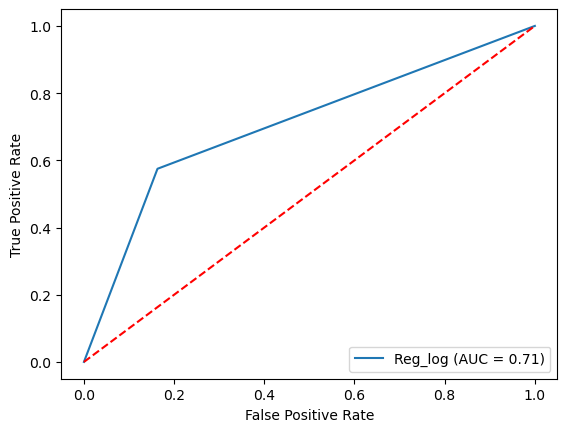

In [20]:
#Utilizamos los códigos vistos en tutoriales para tener distintas métricas de precisión de nuestros modelos

#Matriz de confusión

matriz_confusion = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')
print(matriz_confusion) 

#obtenemos cada elemento de la matriz: 

tn, fp , fn, tp = confusion_matrix(y_test, y_pred).ravel()   
print("Verdadero 0: ", tn)
print("Falso 1: ", fp)
print("Falso 0: ", fn)
print("Verdadero 1: ", tp)


#Specifity: 1 - FP = TN/N
specificity = tn / (tn+fn)
print(f'Specificity: {specificity}')

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# recall: tp / p = tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

#precision
precision = tp/(tp + fp)
print(f'Precision: {precision}')


#Curva ROC

auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
np.set_printoptions(suppress = True)
print(thresholds)
print(f'FPR: {fpr}')  # False Positive Rate
print(f'TPR: {tpr}') #true positive rate (sensitivity)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

B.I MODELO DISCRIMINANTE LINEAL


In [21]:
#Corremos el análisis discriminante lineal

lda = LinearDiscriminantAnalysis(n_components=1)
lda = lda.fit(X_train, y_train)

#hacemos la predicción con la parte de la muestra para testear 
y_pred_lda = lda.predict(X_test)


B.II MEDIDAS DE PRECISIÓN: MODELO DISCRIMINANTE LINEAL

Confusion Matrix:
[[662 129]
 [207 254]]
Specificity: 0.761795166858458
Accuracy: 0.731629
Recall: 0.550976
Precision: 0.6631853785900783
AUC: 0.694
[inf  1.  0.]
FPR: [0.        0.1630847 1.       ]
TPR: [0.         0.55097614 1.        ]


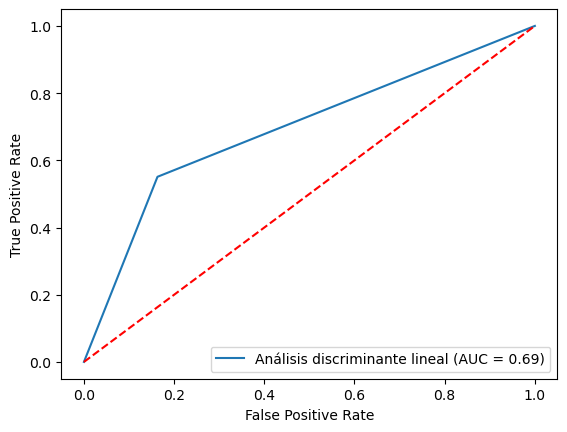

In [22]:
#Nuevamente utilizamos los códigos de la tutorial

#Matriz de confusión

matriz_confusion_lda = confusion_matrix(y_test, y_pred_lda )

print('Confusion Matrix:')
print(matriz_confusion_lda)

#obtenemos cada elemento de la matriz

tn, fp , fn, tp = confusion_matrix(y_test, y_pred_lda).ravel()

#Specifity: 1 - FP = TN/N
specificity_lda = tn / (tn+fn)
print(f'Specificity: {specificity_lda}')

# accuracy: (tp + tn) / (p + n)
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print('Accuracy: %f' % accuracy_lda)

# recall: tp / p = tp / (tp + fn)
recall_lda = recall_score(y_test, y_pred_lda)
print('Recall: %f' % recall_lda)

#precision
precision_lda = tp/(tp + fp)
print(f'Precision: {precision_lda}')

#Curva ROC

auc_lda = roc_auc_score(y_test, y_pred_lda )
print('AUC: %.3f' % auc_lda)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda )
np.set_printoptions(suppress = True)
print(thresholds)
print(f'FPR: {fpr}')  # False Positive Rate
print(f'TPR: {tpr}')


display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_lda, estimator_name='Análisis discriminante lineal')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

In [23]:
#Para vecinos más cercanos definimos k=3 tal como lo exige la consigna
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#realizamos la predicción con la parte de la muestra para testear
y_pred_knn = knn.predict(X_test)


C.II MEDIDAS DE PRECISIÓN (VECINOS MÁS CERCANOS)

Confusion Matrix:
[[633 158]
 [202 259]]
Specificity: 0.7580838323353294
Accuracy: 0.712460
Recall: 0.561822
Precision: 0.6211031175059952
AUC: 0.681
[inf  1.  0.]
FPR: [0.         0.19974716 1.        ]
TPR: [0.         0.56182213 1.        ]


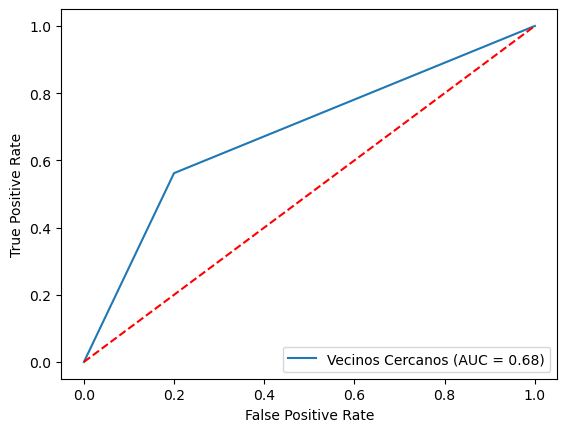

In [28]:
#Nuevamente utilizamos los códigos de la tutorial

#Matriz de confusión

matriz_confusion_knn = confusion_matrix(y_test, y_pred_knn )

print('Confusion Matrix:')
print(matriz_confusion_knn) 



#obtenemos cada elemento de la matriz

tn, fp , fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()


#Specifity: 1 - FP = TN/N
specificity_knn = tn / (tn+fn)
print(f'Specificity: {specificity_knn}')

# accuracy: (tp + tn) / (p + n)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy: %f' % accuracy_knn)

# recall: tp / p = tp / (tp + fn)
recall_knn = recall_score(y_test, y_pred_knn)
print('Recall: %f' % recall_knn)

#precision
precision_knn= tp/(tp + fp)
print(f'Precision: {precision_knn}')#Specifity: 1 - FP = TN/N


#Curva ROC

auc_knn = roc_auc_score(y_test,y_pred_knn )
print('AUC: %.3f' % auc_knn)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
np.set_printoptions(suppress = True)
print(thresholds)
print(f'FPR: {fpr}')  # False Positive Rate
print(f'TPR: {tpr}') 
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_knn, estimator_name='Vecinos Cercanos')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

EJERCICIO 5

Utilizamos el Modelo Logit


In [25]:
#Ahora utilizamos como predictores todas las variables de la base "norespondieron"


X_int_2 = norespondieron.copy()
X_2 = sm.add_constant(X_int_2) 

#Escalamos los datos para evitar un problema de convergencia que tiene el código. 
scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(X_2)  


#Usamos el modelo logit anteriormente definido pero con la nueva matriz de predictores

y_test_pred_2 = log_reg.predict(X_scaled_2)

# Convertimos las probabilidades en Y con valores 1 o 0 (usando el clasificador de Bayes)
y_pred_2 = np.where(y_test_pred_2 > 0.5, 1, y_test_pred_2)
y_pred_2 = np.where(y_test_pred_2 <= 0.5, 0, y_test_pred_2)
                    
#Calculamos las proporciones
prop_pob = (y_pred_2 == 1).mean()
prop_no_pob = (y_pred_2 == 0).mean()

print(prop_pob)

0.31637786472889884


EJERCICIO 6

In [26]:
#Utuilizamos como predictores variables utilizadas para hacer el mapa de correlaciones y que consideramos relevantes
predictores= ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC']




#Definimos nuestra matriz de predictores
X_3 = respondieron[predictores]

X_3= sm.add_constant(X_3) 

#definimos nuestra variable dependiente
y_3= respondieron['pobre']

#volvemos a entrenar el modelo con el 70% de la muestra
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.3, random_state=201)

#corremos nuestro modelo
log_reg_3 = LogisticRegression().fit(X_train, y_train)
y_test_pred_score_3 = log_reg_3.predict_proba(X_test)[:,1]
y_test_pred_3 = log_reg_3.predict(X_test)

# Convertimos las probabilidades en Y con valores 1 o 0 (usando el clasificador de Bayes)
y_pred_3 = np.where(y_test_pred_3 > 0.5, 1, y_test_pred_3)
y_pred_3 = np.where(y_test_pred_3 <= 0.5, 0, y_test_pred_3)

#Calculamos la proporcion de pobres
prop_pob_3 = (y_pred_3 == 1).mean()
prop_no_pob_3 = (y_pred_3 == 0).mean()


print(prop_pob_3)
print(prop_no_pob_3)

0.2915335463258786
0.7084664536741214


C:\Users\juliv\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[649 142]
 [238 223]]
Specificity: 0.7316798196166855
Accuracy: 0.696486
Recall: 0.483731
Precision: 0.6109589041095891
AUC: 0.652
[inf  1.  0.]
FPR: [0.        0.1795196 1.       ]
TPR: [0.         0.48373102 1.        ]


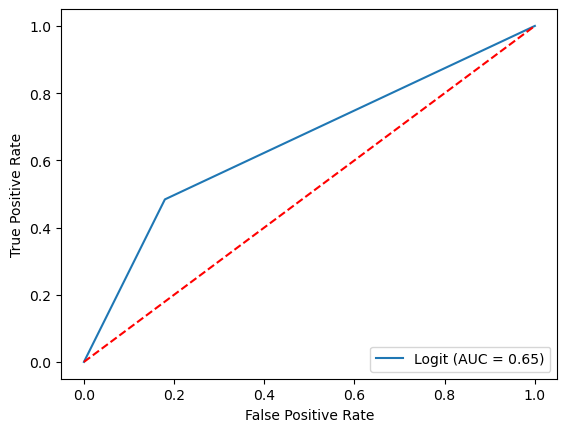

In [29]:
 # Nuevamente utilizamos los codigos de tutoriales para realizar las métricas de precisión
#Matriz de confusión

matriz_confusion_3 = confusion_matrix(y_test, y_pred_3)

print('Confusion Matrix:')
print(matriz_confusion_3) 


#obtenemos cada elemento de la matriz

tn, fp , fn, tp = confusion_matrix(y_test, y_pred_3).ravel()

#Specifity: 1 - FP = TN/N
specificity_3 = tn / (tn+fn)
print(f'Specificity: {specificity_3}')

# accuracy: (tp + tn) / (p + n)
accuracy_3 = accuracy_score(y_test, y_pred_3)
print('Accuracy: %f' % accuracy_3)

# recall: tp / p = tp / (tp + fn)
recall_3 = recall_score(y_test, y_pred_3)
print('Recall: %f' % recall_3)

#precision
precision_3 = tp/(tp + fp)
print(f'Precision: {precision_3}')


#Curva ROC

auc_3 = roc_auc_score(y_test, y_pred_3)
print('AUC: %.3f' % auc_3)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_3)
np.set_printoptions(suppress = True)
print(thresholds)
print(f'FPR: {fpr}')  # False Positive Rate
print(f'TPR: {tpr}') #true positive rate (sensitivity)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_3, estimator_name='Logit')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 